# Mustererkennung Übung 5
### Benjamin Kiesling, Peewee Manzer 

### 1. Aufgabe (5 Punkte): Lineare Regression
Importieren Sie den Datensatz fish.txt in matlab. Das Format ist:
index ; the age of the fish ; the water temperature in degrees Celsius ; the length of the fish
#### a. (3 Punkte)
Schätzen Sie den Wert für “length” anhand der Parameter “age” und “temperature” mit
linearer Regression. Visualisieren Sie dreidimensional die tatsächlichen Datenpunkte, die
geschätzten Datenpunkte, sowie die Abstände der tatsächlichen zu den geschätzten Datenpunkten.


In [53]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
# make plots bigger

plt.rcParams['figure.figsize'] = 16, 16  

In [66]:
#loadData
fishData = pd.read_csv("./fish.txt",delim_whitespace=True, dtype={'names': ('index', 'fish age', 'water temperature','fish length'),
                     'formats': ('i4','i4', 'i4','i4' )},index_col=0, names = [None, 'fish age', 'water temperature','fish length'])
fishData.head()

,fish age,water temperature,fish length
1,14,25,620
2,28,25,1315
3,41,25,2120
4,55,25,2600
5,69,25,3110


In [90]:
from sklearn.linear_model import LinearRegression
y = fishData['fish length']
features = ['fish age','water temperature']
x = fishData[features]
lm = LinearRegression()
lm.fit(x,y)

print lm.intercept_
print lm.coef_
zip(features, lm.coef_)

3904.26601675
[  26.24068177 -106.41363636]


[('fish age', 26.240681765825116), ('water temperature', -106.41363636363633)]

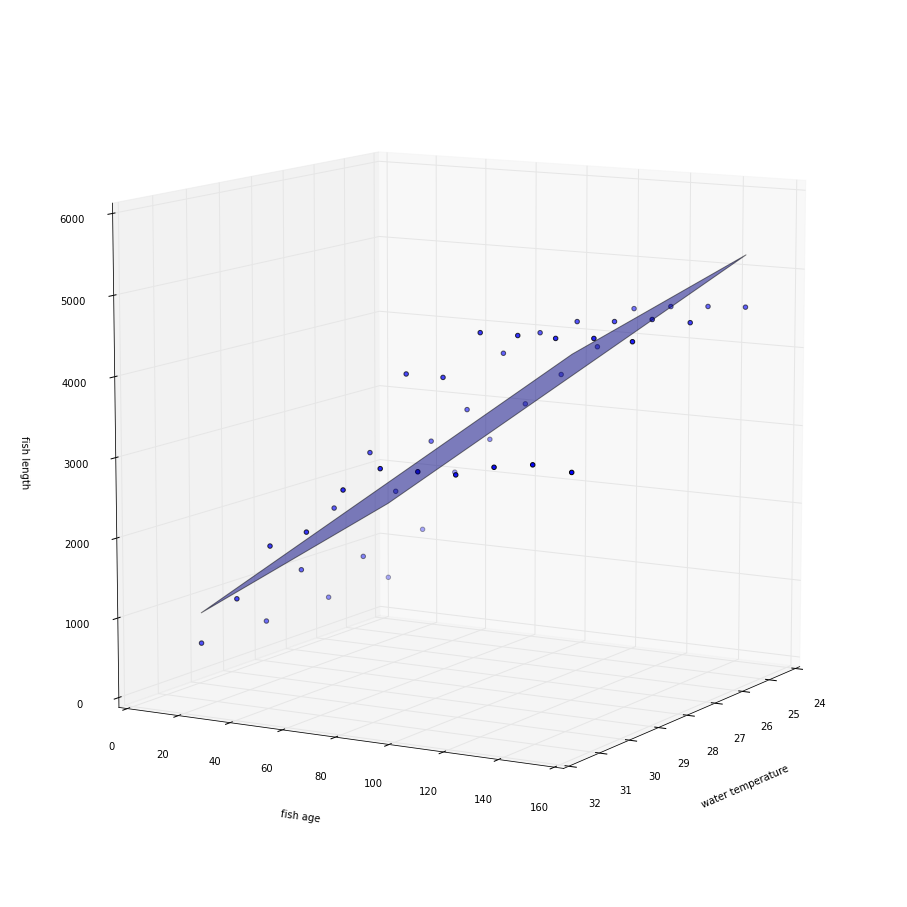

In [221]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d',azim = 30,elev = 10)

x = list(fishData['water temperature'])
y = list(fishData['fish age'])
z = list(fishData['fish length'])

x_min = fishData['water temperature'].min()
x_max = fishData['water temperature'].max()

y_min = fishData['fish age'].min()
y_max = fishData['fish age'].max()


x_range = np.arange(x_min,x_max)
y_range = np.arange(y_min,y_max)
x_surf, y_surf = np.meshgrid(x_range, y_range)

ax.scatter(x,y,z)

ax.plot_surface(np.array([[x_min,x_min],[x_max,x_max]]),
                np.array([[y_min,y_max],[y_min,y_max]]),
                lm.predict(np.array([[y_min,y_max,y_min,y_max],[x_min,x_min,x_max,x_max]]).T).reshape((2, 2)),
                alpha=.5)


ax.set_xlabel('water temperature')
ax.set_ylabel('fish age')
ax.set_zlabel('fish length')


plt.show()




In [129]:
np.array([[0, 0, .15, .15], [0, .15, 0, .15]]).T

array([[ 0.  ,  0.  ],
       [ 0.  ,  0.15],
       [ 0.15,  0.  ],
       [ 0.15,  0.15]])

#### b. (2 Punkte) Visualisieren Sie die durch die in Aufgabe a) berechneten Koeffizienten definierte Ebene.

#### 2. Aufgabe (5 Punkte): Subset Selection
Importieren Sie den Datensatz winequalityred.
txt in matlab. Das Format ist:
fixed acidity; volatile acidity; citric acid; residual sugar; chlorides; free sulfur dioxide; total sulfur dioxide;
density; pH; sulphates; alcohol; quality (score between 0 and 10)
Schätzen Sie den Wert für “quality” mit linearer Regression anhand aller möglichen Kombinationen der
anderen Parameter (also jeweils für alle Einer,
Zweier,
Dreierkombinationen, usw.) und berechnen jeweils
die Summe der quadratischen Abweichungen zwischen den geschätzten und tatsächlichen Werten für
“quality”. Visualisieren Sie dies als zweidimensionalen Plot. Auf der xAchse
steht dabei die Anzahl der
verwendeten Parameter, auf der yAchse
die Summe der quadratischen Abweichungen (für alle
Kombinationen der jeweiligen Anzahl der Parameter) .
